# Modèle DeepLearning - Bank marketing

## Exercice 1 : Entrainement d'un MLP sur le jeu de données `Bank marketing`

1. Complétez le code suivant en renseignant le chemin vers le jeu de données `Bank marketing` puis exécutez le code afin d'obtenir les variables d'entrainement et de test.

In [1]:
#import des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
"""Definition d'une fonction qui prend en parametre la variable history (historique d'entrainement d'un modèle) 
et qui affiche un graphique légendé
"""

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


file_path = "train.csv"

In [3]:
# Import du jeu de données
df = pd.read_csv(file_path)

X = df.drop(['ID', 'contact', 'month', 'day', 'y'], axis=1)
y = df['y']

In [4]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [5]:
X

,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome
0,29,technician,single,tertiary,no,18254,no,no,2,-1,0,unknown
1,26,services,single,secondary,no,512,yes,yes,3,-1,0,unknown
2,30,management,single,secondary,no,135,no,no,2,-1,0,unknown
3,41,technician,married,unknown,no,30,yes,no,1,-1,0,unknown
4,27,admin.,single,secondary,no,321,no,yes,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,1,87,5,failure
12866,31,unknown,married,secondary,no,111,no,no,2,93,2,failure
12867,37,unemployed,single,tertiary,no,1316,yes,no,1,172,2,failure
12868,42,management,married,tertiary,no,479,yes,no,2,-1,0,unknown


In [6]:
# Encodage des variables catégorielles
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

# Normalisation des données
sc = StandardScaler()
X = sc.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Dans les codes précents, j'importe d'abord les bibliothèques et les fonctions dont je vais avoir besoin. Puis j'ai défini une fonction qui prend en parametre la variable history (historique d'entrainement d'un modèle) et qui affiche un graphique légendé lorqu'elle est appelée; importé mon jeu de données 'train.csv'; nettoyé et normalisé mon jeu de données puis séparé les données de train et de test.








...



2. Créez un réseau de neurones profond avec 3 couches cachées de 10 neurones chacune et une couche de sortie de 1 neurone. Utilisez la fonction d'activation `relu` pour les couches cachées et `sigmoid` pour la couche de sortie. 

In [7]:
import tensorflow as tf

In [8]:
# Trouver le nombre de colonnes
num_features = X.shape[1]

In [9]:
num_features

12

In [10]:

# Création du modèle
model = tf.keras.models.Sequential([
  # Couche d'entrée
  tf.keras.layers.Input(shape=(num_features,)),
  # 1ère couche cachée
  tf.keras.layers.Dense(10, activation='relu'),
  # 2ème couche cachée
  tf.keras.layers.Dense(10, activation='relu'),
  # 3ème couche cachée
  tf.keras.layers.Dense(10, activation='relu'),
  # Couche de sortie
  tf.keras.layers.Dense(1, activation='sigmoid')
])


Dans les codes précents, j'importe d'abord la bibliotheque tensorflow pour pouvoir utiliser la méthode Keras pour créer un reseau de neurones profond. Je definis ensuite une varable qui va me donner le nombres de colonnes présentes dans mon jeu de de données traité. Je vais ensuite mettre cette variable dans la couche d'entrée du réseau de neurones profond puisque le réseau de neurones est construit selon ce jeu de données.







...

3. Compilez le modèle en utilisant l'optimiseur `adam` et la fonction de perte `binary_crossentropy`.

In [11]:
# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

4. Entraînez le modèle en utilisant 10 epochs et une taille de batch de 32 et stockez l'historique de l'entraînement dans la variable `history`.   

    Utilisez la méthode fit du modèle : `fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=5, batch_size=10, verbose=1)`


In [12]:

# Entraînement et stockage du modèle (10 epochs, batch de 32) dans une vaiable history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)
history

Epoch 1/10
322/322 [==============================] - 1s 2ms/step - loss: 0.6204 - accuracy: 0.6719 - val_loss: 0.5659 - val_accuracy: 0.7397
Epoch 2/10
322/322 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.7220 - val_loss: 0.5516 - val_accuracy: 0.7467
Epoch 3/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7310 - val_loss: 0.5443 - val_accuracy: 0.7521
Epoch 4/10
322/322 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7363 - val_loss: 0.5400 - val_accuracy: 0.7556
Epoch 5/10
322/322 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7424 - val_loss: 0.5400 - val_accuracy: 0.7572
Epoch 6/10
322/322 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.7449 - val_loss: 0.5345 - val_accuracy: 0.7599
Epoch 7/10
322/322 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.7455 - val_loss: 0.5351 - val_accuracy: 0.7618
Epoch 

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10, verbose=1)

Epoch 1/5
1030/1030 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7470 - val_loss: 0.5361 - val_accuracy: 0.7584
Epoch 2/5
1030/1030 [==============================] - 1s 1ms/step - loss: 0.5368 - accuracy: 0.7495 - val_loss: 0.5286 - val_accuracy: 0.7611
Epoch 3/5
1030/1030 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7508 - val_loss: 0.5286 - val_accuracy: 0.7650
Epoch 4/5
1030/1030 [==============================] - 2s 2ms/step - loss: 0.5353 - accuracy: 0.7505 - val_loss: 0.5258 - val_accuracy: 0.7595
Epoch 5/5
1030/1030 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7521 - val_loss: 0.5247 - val_accuracy: 0.7618


5. Affichez l'historique de l'entraînement en utilisant la fonction `plot_history`.

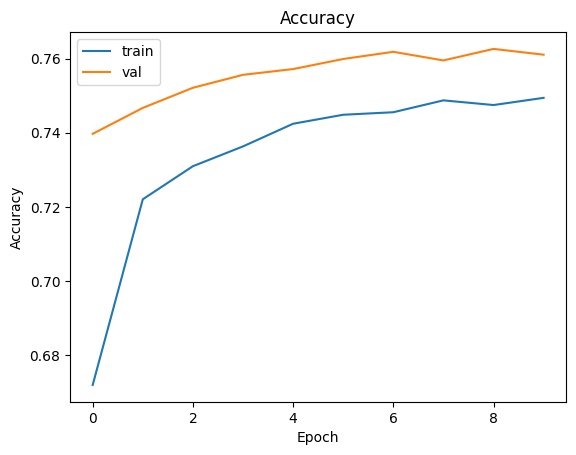

None


In [14]:
print(plot_history(history))

6. Obtenez les prédictions du modèle sur les données de test avec la méthode `predict` et calculez l'accuracy du modèle avec la fonction `accuracy_score` de la librairie `sklearn.metrics`. Utilisez une liste compréhension pour convertir les prédictions en 0 ou 1 avec un seuil de 0.5.


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# Obtention des prédictions sur les données de test
y_pred = model.predict(X_test)

# Conversion des prédictions en 0 ou 1 avec un seuil de 0.5
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Précision du modèle : ", accuracy)

81/81 [==============================] - 0s 819us/step
Précision du modèle :  0.7618492618492618


7. Affichez les poids du modèle avec l'attribut `get_weights` du modèle. Comment est-ce que les poids sont stockés ?

In [17]:
model.get_weights()

[array([[ 0.43267715, -0.30765405,  0.65646446, -0.7111104 , -0.06242079,
         -0.06201887,  0.03777221,  0.3438227 ,  0.3605661 , -0.32474917],
        [ 0.41187024,  0.11786679, -0.121343  ,  0.15030378, -0.01439506,
          0.16729769, -0.28170598,  0.20659465, -0.03224804,  0.13323486],
        [-0.5194471 , -0.4741414 , -0.06900245,  0.46203205,  0.25476333,
          0.0751146 ,  0.1759069 , -0.14721158,  0.23416744, -0.1945945 ],
        [ 0.01674577,  0.10041129, -0.08853795, -0.08670712,  0.28093237,
         -0.09986836,  0.16474302,  0.29921392, -0.3171061 ,  0.24101031],
        [-0.22832976,  0.1426104 ,  0.47729424,  0.25456703, -0.3513322 ,
          0.22566035, -0.36508805, -0.14872439, -0.5213613 ,  0.3012358 ],
        [-0.17750442,  0.29089004,  0.3743983 ,  0.19003384,  0.26616046,
          0.43341476,  0.151698  ,  0.3856441 , -0.3195811 ,  0.1347361 ],
        [-0.12479235, -0.23514535,  0.11595639, -0.01326921, -0.44623664,
         -0.0084688 ,  0.2705732

Ces poids sont stockées sous formes de listes de listes





...

8. Changez les hyperparamètres du modèle et observez l'impact sur l'accuracy du modèle.
- fonction d'activation, 
- nombre de couches, 
- nombre de neurones, 
- optimiseur, 
- fonction de perte, 
- nombre d'epochs, 
- taille de batch

Au moins 3 configurations différentes doivent être testées.
Quel est le meilleur modèle que vous avez obtenu ? 

### Configuration n°1

2 couches cachées au lieu de 3; toutes deux utilisant la fonction d'activation sigmoid; optimiseur 'adam'; fonction de perte 'binary_crossentropy', 15 epochs, batch de 32


In [18]:
#Configuration n°1


# Création du modèle 
modelConfig1 = tf.keras.models.Sequential([
  # Couche d'entrée
  tf.keras.layers.Input(shape=(num_features,)),
  # 1ère couche cachée
  tf.keras.layers.Dense(10, activation='sigmoid'),
  # 2ème couche caché"
  tf.keras.layers.Dense(10, activation='sigmoid'),
  # Couche de sortie
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
modelConfig1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Entrainement du modèle
modelConfig1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32, verbose=1)


# Obtention des prédictions sur les données de test
y_pred1 = modelConfig1.predict(X_test)

# Conversion des prédictions en 0 ou 1 avec un seuil de 0.5
y_pred1 = [1 if pred > 0.5 else 0 for pred in y_pred1]


Epoch 1/15
322/322 [==============================] - 1s 2ms/step - loss: 0.6204 - accuracy: 0.6867 - val_loss: 0.5890 - val_accuracy: 0.7051
Epoch 2/15
322/322 [==============================] - 0s 1ms/step - loss: 0.5908 - accuracy: 0.6885 - val_loss: 0.5665 - val_accuracy: 0.7059
Epoch 3/15
322/322 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7016 - val_loss: 0.5560 - val_accuracy: 0.7350
Epoch 4/15
322/322 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7188 - val_loss: 0.5520 - val_accuracy: 0.7424
Epoch 5/15
322/322 [==============================] - 1s 2ms/step - loss: 0.5650 - accuracy: 0.7235 - val_loss: 0.5517 - val_accuracy: 0.7397
Epoch 6/15
322/322 [==============================] - 0s 1ms/step - loss: 0.5631 - accuracy: 0.7270 - val_loss: 0.5494 - val_accuracy: 0.7397
Epoch 7/15
322/322 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.7274 - val_loss: 0.5470 - val_accuracy: 0.7424
Epoch 

In [19]:
# Calcul de l'accuracy
accuracy1 = accuracy_score(y_test, y_pred1)

print("Précision du modèle de la Configuration 1 : ", accuracy1)

Précision du modèle de la Configuration 1 :  0.7451437451437452


### Configuration n°2

3 couches cachées; 20 neurones par couches; toutes trois utilisant la fonction d'activation relu; optimiseur 'sgd'; fonction de perte 'mean_squared_error', 10 epochs, batch de 64


In [20]:
#Configuration n°2


# Création du modèle
modelConfig2 = tf.keras.models.Sequential([
  # Couche d'entrée
  tf.keras.layers.Input(shape=(num_features,)),
  # 1ère couche cachée
  tf.keras.layers.Dense(20, activation='relu'),
  # 2ème couche cachée
  tf.keras.layers.Dense(20, activation='relu'),
  # 3ème couche cachée
  tf.keras.layers.Dense(20, activation='relu'),
  # Couche de sortie
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
modelConfig2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

#Entrainement du modèle
modelConfig2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64, verbose=1)


# Obtention des prédictions sur les données de test
y_pred2 = modelConfig1.predict(X_test)

# Conversion des prédictions en 0 ou 1 avec un seuil de 0.5
y_pred2 = [1 if pred > 0.5 else 0 for pred in y_pred2]


Epoch 1/10
161/161 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.6198 - val_loss: 0.2240 - val_accuracy: 0.7016
Epoch 2/10
161/161 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.6882 - val_loss: 0.2115 - val_accuracy: 0.7051
Epoch 3/10
161/161 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.6884 - val_loss: 0.2061 - val_accuracy: 0.7051
Epoch 4/10
161/161 [==============================] - 0s 2ms/step - loss: 0.2104 - accuracy: 0.6884 - val_loss: 0.2035 - val_accuracy: 0.7051
Epoch 5/10
161/161 [==============================] - 0s 2ms/step - loss: 0.2087 - accuracy: 0.6884 - val_loss: 0.2019 - val_accuracy: 0.7051
Epoch 6/10
161/161 [==============================] - 0s 2ms/step - loss: 0.2075 - accuracy: 0.6884 - val_loss: 0.2008 - val_accuracy: 0.7051
Epoch 7/10
161/161 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.6884 - val_loss: 0.1998 - val_accuracy: 0.7051
Epoch 

In [21]:
# Calcul de l'accuracy
accuracy2 = accuracy_score(y_test, y_pred2)

print("Précision du modèle de la Configuration 2 : ", accuracy2)

Précision du modèle de la Configuration 2 :  0.7451437451437452


### Configuration n°3

1 couches cachée; 5 neurones par couches; fonction d'activation relu; optimiseur 'adam'; fonction de perte 'binary_crossentropy', 20 epochs, batch de 15


In [22]:
#Configuration n°3


# Création du modèle
modelConfig3 = tf.keras.models.Sequential([
  # Couche d'entrée
  tf.keras.layers.Input(shape=(num_features,)),
  # 1ère couche cachée
  tf.keras.layers.Dense(5, activation='relu'),
  # Couche de sortie
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
modelConfig3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Entrainement du modèle
modelConfig3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=15, verbose=1)


# Obtention des prédictions sur les données de test
y_pred3 = modelConfig3.predict(X_test)

# Conversion des prédictions en 0 ou 1 avec un seuil de 0.5
y_pred3 = [1 if pred > 0.5 else 0 for pred in y_pred3]


Epoch 1/20
687/687 [==============================] - 3s 3ms/step - loss: 0.8003 - accuracy: 0.5050 - val_loss: 0.6419 - val_accuracy: 0.6841
Epoch 2/20
687/687 [==============================] - 1s 2ms/step - loss: 0.6052 - accuracy: 0.6888 - val_loss: 0.5712 - val_accuracy: 0.7214
Epoch 3/20
687/687 [==============================] - 1s 2ms/step - loss: 0.5701 - accuracy: 0.7184 - val_loss: 0.5619 - val_accuracy: 0.7401
Epoch 4/20
687/687 [==============================] - 2s 2ms/step - loss: 0.5641 - accuracy: 0.7278 - val_loss: 0.5584 - val_accuracy: 0.7401
Epoch 5/20
687/687 [==============================] - 1s 2ms/step - loss: 0.5614 - accuracy: 0.7312 - val_loss: 0.5553 - val_accuracy: 0.7420
Epoch 6/20
687/687 [==============================] - 1s 2ms/step - loss: 0.5597 - accuracy: 0.7309 - val_loss: 0.5542 - val_accuracy: 0.7382
Epoch 7/20
687/687 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7336 - val_loss: 0.5520 - val_accuracy: 0.7397
Epoch 

In [23]:
# Calcul de l'accuracy
accuracy3 = accuracy_score(y_test, y_pred3)

print("Précision du modèle de la Configuration 3 : ", accuracy3)

Précision du modèle de la Configuration 3 :  0.7571872571872572


9. Sauvegardez le modèle en utilisant la méthode `save` du modèle. Chargez le modèle en utilisant la méthode `load_model` de la librairie `tensorflow.keras.models`.


In [24]:
#On energistre le modèle avec un format ".h5" qui est une extension utilisée pour les formats de stockage de données.

model.save("Model.h5")

In [25]:
from tensorflow.keras.models import load_model

In [26]:

model = load_model("Model.h5")

10. Publiez votre projet sur GitHub et placez le lien dans dans le fichier [suivant](https://docs.google.com/spreadsheets/d/1mnS5XL4pJNmQNclndP2LZPCELOi1OmBKoW3803xyK8c/edit?usp=sharing).
